#Modelo de agrupamiento: K-Means

##Lectura de datos y generación de dataset

In [ ]:
#Importar la biblioteca pandas
import pandas as pd

#Especificar la ruta del archivo CSV
file_path = './data/data_ane.csv'

#Leer el archivo CSV y crear el dataframe
df = pd.read_csv(file_path, sep=',')

#Mostrar las primeras filas del dataframe para verificar que se haya leído correctamente
df.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M,TARGET
0,48.2,14.9,5.17,93.1,28.9,31.0,0
1,49.8,16.2,5.42,91.9,30.0,32.6,0
2,46.3,14.7,4.63,100.0,31.8,31.7,1
3,49.0,15.8,5.36,91.4,29.4,32.2,0
4,43.9,14.0,4.79,91.7,29.2,31.8,0


##Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##Estandarización de datos

In [ ]:
X = df.drop(columns='TARGET')

In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)


##Método del codo

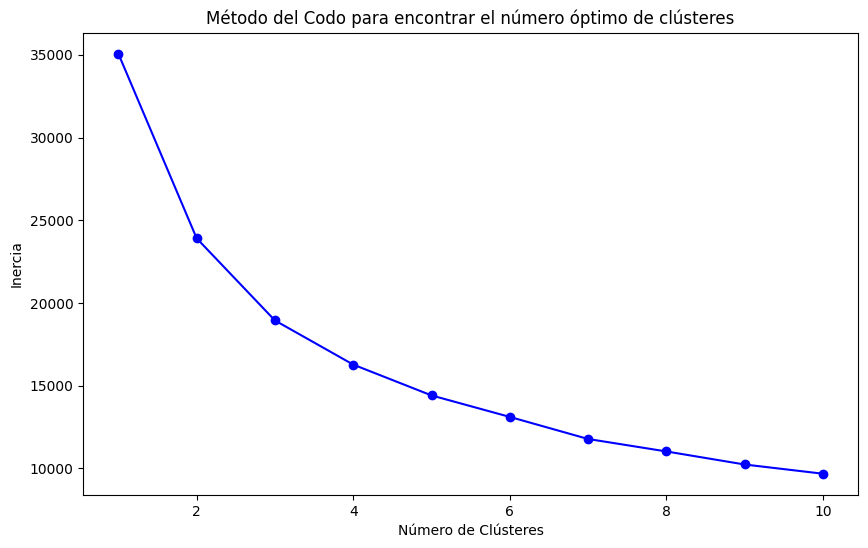

In [ ]:
# Calcular la inercia para diferentes números de clústeres
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clústeres')
plt.show()


##Implementación del modelo

In [ ]:
# Inicializar el modelo de K-means con el número óptimo de clústeres
optimal_clusters = 3  # Cambia esto basado en el gráfico del codo
kmeans = KMeans(n_clusters=optimal_clusters)

# Ajustar el modelo y predecir los clústeres
y_kmeans = kmeans.fit_predict(X_scaled)



##Visualización de clústers

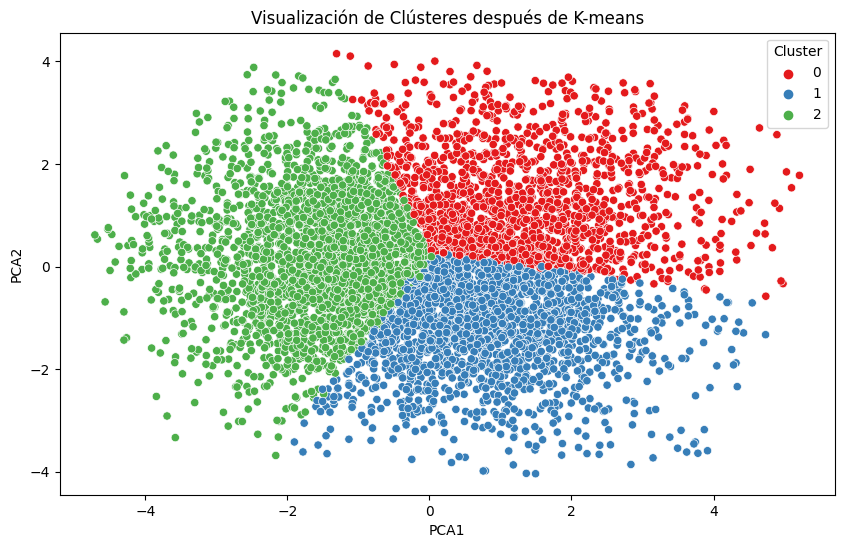

In [ ]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales y los clústeres
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = y_kmeans

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df_pca)
plt.title('Visualización de Clústeres después de K-means')
plt.show()
